# Analysis of NeurIPS 2023 Accepted Papers

In [1]:
# !pip install wordcloud

In [2]:
import json
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc_file('matplotlibrc')

from wordcloud import WordCloud

## Loading the Data

In [3]:
with open("data/neurips2022data.json", "r") as f:
    neurips_2022_data = json.load(f)

with open("data/neurips2023data.json", "r") as f:
    neurips_2023_data = json.load(f)

with open("data/stopwords.txt", "r") as f:
    stopwords = f.read().split("\n")

In [4]:
titles_2022 = [d.lower() for d in neurips_2022_data.keys()]
titles_2023 = [d.lower() for d in neurips_2023_data.keys()]

## Wordclouds

In [5]:
def generate_wordcloud(titles, stopwords, filename):
    title_text = ' '.join(titles)
    title_text = ' '.join([word for word in title_text.split() if word not in stopwords])

    wordcloud = WordCloud(
        max_font_size=100, 
        min_font_size = 10, 
        max_words=100, 
        background_color="white", 
        width = 533*2, 
        height = 253*2, 
        mode="RGBA"
        ).generate(title_text)
    # wordcloud.to_file(filename)

In [6]:
for year, titles in zip(["2022", "2023"], [titles_2022, titles_2023]):
    generate_wordcloud(titles, stopwords, f"images/wordcloud_{year}.png");

### 2023 Title Wordcloud

![Neurips 2023 Title Wordcloud](images/wordcloud_2023.png)

## Abstract Lengths

In [7]:
for v in neurips_2023_data.values():
    if "abstract" not in v:
        print(v)

In [8]:
keys = list(neurips_2023_data.keys())

abstracts = [neurips_2023_data[key]["abstract"] for key in keys]
abstracts = [abstract.lower() for abstract in abstracts if abstract!=""]
abstract_lengths = [len(abstract.split()) for abstract in abstracts]

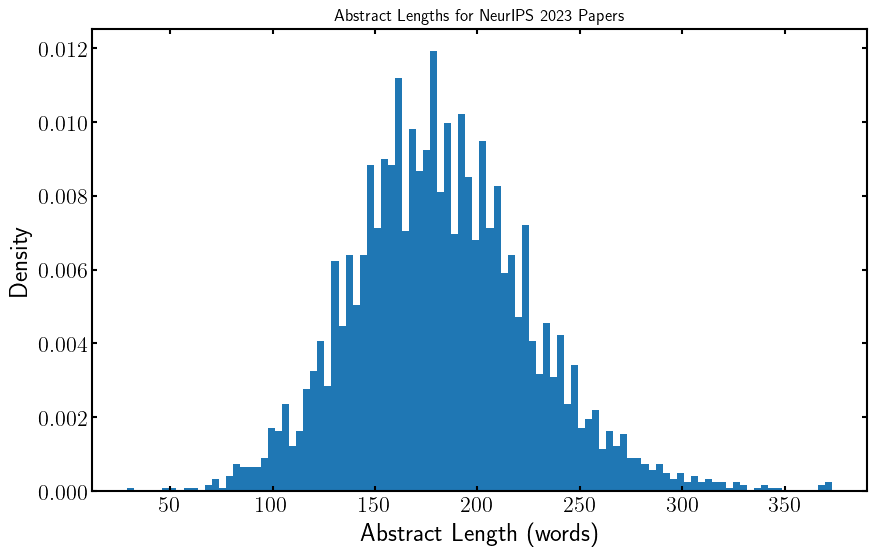

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(abstract_lengths, bins=100, density=True);
plt.xlabel("Abstract Length (words)");
plt.ylabel("Density");
plt.title("Abstract Lengths for NeurIPS 2023 Papers");
# plt.savefig("images/abstract_histogram_2023.png");

In [10]:
sorted_abstracts = sorted(zip(abstract_lengths, abstracts), key=lambda x: x[0], reverse=True)

Longest abstract:

In [11]:
print(sorted_abstracts[0][1])
print("-"*100)

print(f"Num words {len(sorted_abstracts[0][1].split())}")

scope of reproducibility — this paper aims to reproduce the study faircal: fairness calibration for face verification by salvador et al., focused on verifying three main claims: faircal (introduced by the authors) achieves state‐of‐the‐art (i) global accuracy, (ii) fairness-calibrated probabilities and (iii) equality in false positive rates across sensitive attributes (i.e. predictive equality). the sensitive attribute taken into account is ethnicity.methodology — salvador et al. provide partial code via a github repository. additional code to generate image embeddings from three pretrained neural network models were based on existing repositories. all code was refactored to fit our needs, keeping extendability and readability in mind. two datasets were used, namely, balanced faces in the wild (bfw) and racial faces in the wild (rfw). additional experiments using gaussian mixture models instead of k‐means clustering for faircal validate the use of unsupervised clus‐ tering methods. the

☝️ From "[Re] On the Reproducibility of \u201cFairCal: Fairness Calibration for Face Verification\u201d"

Shortest abstract:

In [12]:
print(sorted_abstracts[-1][1])

print(f"Num words {len(sorted_abstracts[-1][1].split())}")

in this work, we study the convergence in high probability of clipped gradient methods when the noise distribution has heavy tails, i.e., with bounded $p$th moments, for some $1
Num words 29


☝️ This is a spotlight poster: "Improved Convergence in High Probability of Clipped Gradient Methods with Heavy Tailed Noise"

## Number of Authors

In [13]:
num_authors_2022 = [
    len(v) for v in neurips_2022_data.values()
]

num_authors_2023 = [
    len(neurips_2023_data[k]['authors']) for k in keys
]

In [14]:
from collections import Counter

author_counts_2022 = Counter(num_authors_2022)
author_counts_2023 = Counter(num_authors_2023)

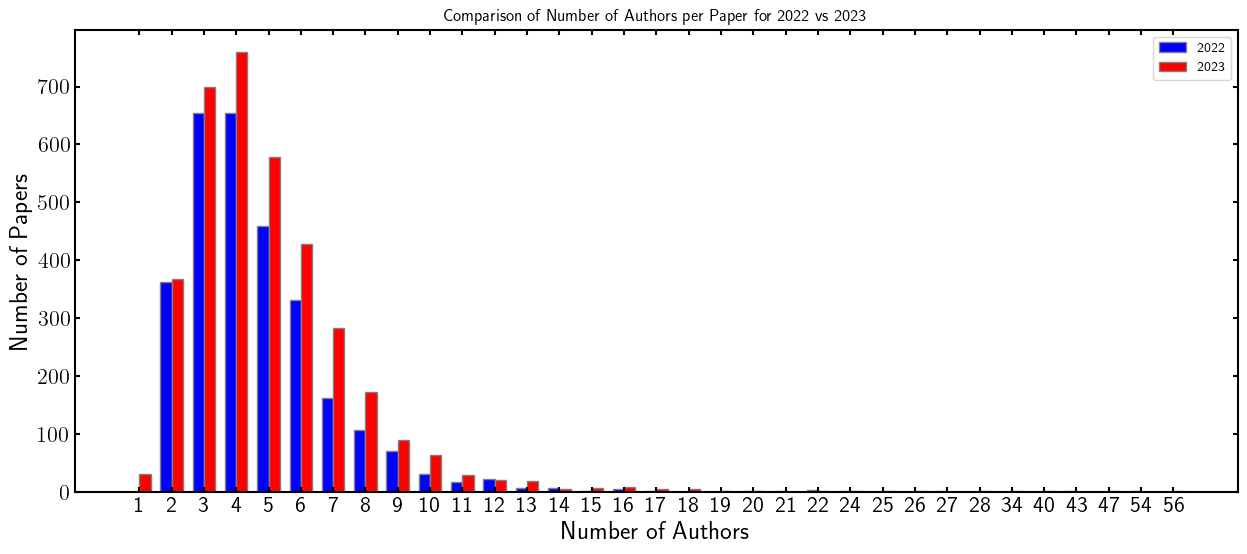

In [15]:
all_keys = sorted(set(author_counts_2022.keys()).union(set(author_counts_2023.keys())))
values_2022 = [author_counts_2022.get(k, 0) for k in all_keys]
values_2023 = [author_counts_2023.get(k, 0) for k in all_keys]

# Set up the bar width and positions
bar_width = 0.35
r1 = range(len(all_keys))
r2 = [x + bar_width for x in r1]

# Create bar chart
plt.figure(figsize=(15, 6))
plt.bar(r1, values_2022, color='blue', width=bar_width, edgecolor='grey', label='2022')
plt.bar(r2, values_2023, color='red', width=bar_width, edgecolor='grey', label='2023')
# Add labels and title
plt.xlabel('Number of Authors')
plt.ylabel('Number of Papers')
plt.title('Comparison of Number of Authors per Paper for 2022 vs 2023')
plt.xticks([r + bar_width / 2 for r in r1], all_keys);

# Add a legend
plt.legend();
# plt.savefig("images/num_authors_2022_2023.png")

Apparently there were some papers in 2023 with 1 author, when there were none in 2022.

#### Mean Number of Authors

In [16]:
mean_authors_2022 = np.mean(num_authors_2022)
mean_authors_2023 = np.mean(num_authors_2023)

print(f"Mean number of authors per paper in 2022: {mean_authors_2022}")
print(f"Mean number of authors per paper in 2023: {mean_authors_2023}")

Mean number of authors per paper in 2022: 4.658620689655172
Mean number of authors per paper in 2023: 4.981026785714286


Despite the single author papers, the mean number of authors in 2023 is still higher than in 2022.

#### Paper with the Most Authors

In [17]:
neurips_2023_data[keys[int(np.argmax(num_authors_2023))]]["title"]

'ClimSim: A large multi-scale dataset for hybrid physics-ML climate emulation'

### Most Prolific Authors

*Note*: This assumes that the author names are consistent across papers, and that the author names are unique, which is not always the case!

In [18]:
unique_authors_2022 = set()
for v in neurips_2022_data.values():
    unique_authors_2022.update(v)

unique_authors_2023 = set()
for v in neurips_2023_data.values():
    unique_authors_2023.update(v["authors"])

print(f"Number of unique authors in 2022: {len(unique_authors_2022)}")
print(f"Number of unique authors in 2023: {len(unique_authors_2023)}")

authors_counts = {
    author_name: 0 for author_name in unique_authors_2023
}

for v in neurips_2023_data.values():
    for author in v["authors"]:
        authors_counts[author] += 1

authors_counts = sorted(authors_counts.items(), key=lambda x: x[1], reverse=True)

Number of unique authors in 2022: 9913
Number of unique authors in 2023: 13012


In [19]:
print(f"Most prolific authors in 2023:")
print("-----------------------------")
for author, count in authors_counts[:10]:
    print(f"{author}: {count} papers")

Most prolific authors in 2023:
-----------------------------
Bo Li: 15 papers
Ludwig Schmidt: 14 papers
Bo Han: 13 papers
Mihaela van der Schaar: 13 papers
Hao Wang: 12 papers
Dacheng Tao: 11 papers
Bernhard Schölkopf: 11 papers
Masashi Sugiyama: 11 papers
Andreas Krause: 11 papers
Tongliang Liu: 11 papers


## Title Length Comparison between 2022 and 2023

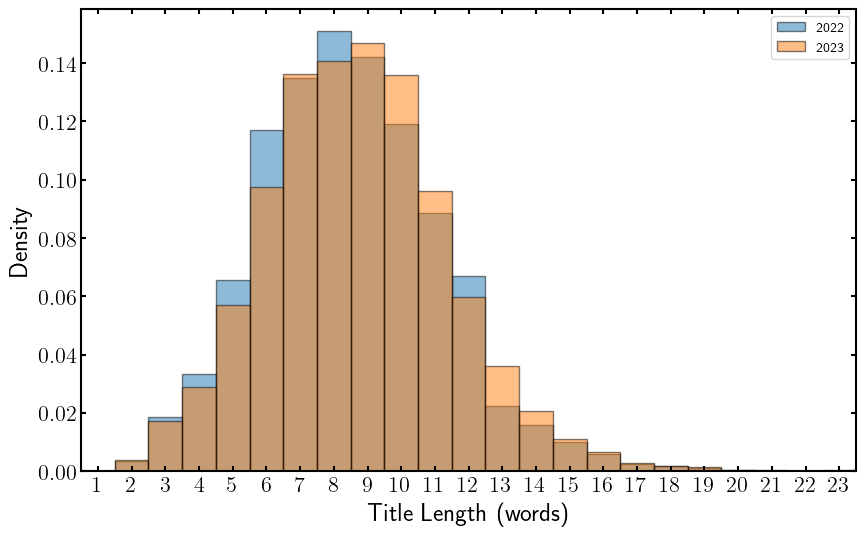

In [20]:
title_lengths_2022 = [len(title.split()) for title in titles_2022]
title_lengths_2023 = [len(neurips_2023_data[key]["title"].split()) for key in keys]

# Find the maximum title length in both years
max_length = max(max(title_lengths_2022), max(title_lengths_2023))

# Create bins from 0.5 to max_length + 0.5 to center bins on integers
bins = [i + 0.5 for i in range(max_length + 1)]

plt.figure(figsize=(10, 6))

# Plot histograms with density and centered bars
plt.hist(title_lengths_2022, bins=bins, edgecolor='black', alpha=0.5, density=True, label="2022")
plt.hist(title_lengths_2023, bins=bins, edgecolor='black', alpha=0.5, density=True, label="2023")

plt.xlabel("Title Length (words)")
plt.ylabel("Density")
plt.xticks(range(1, max_length + 1))  # Set x-ticks to be integers
plt.xlim(0.5, max_length + 0.5)  # Set x-axis limits to align with bins
plt.legend()
# plt.savefig("images/title_length_histogram_2022_2023.png");

In [22]:
mean_title_length_2022 = np.mean(title_lengths_2022)
mean_title_length_2023 = np.mean(title_lengths_2023)

print(f"Mean title length in 2022: {mean_title_length_2022}")
print(f"Mean title length in 2023: {mean_title_length_2023}")

Mean title length in 2022: 8.479310344827587
Mean title length in 2023: 8.721261160714286


Titles are trending longer in 2023!

### Acronyms

In [23]:
def _introduces_acronym(title):
    return ":" in title and len(title.split(":")[0].split("(")[0].split()) == 1

In [24]:
num_acronyms_2022 = sum([_introduces_acronym(title) for title in titles_2022])
num_acronyms_2023 = sum([_introduces_acronym(neurips_2023_data[key]["title"]) for key in keys])

percentage_acronyms_2022 = num_acronyms_2022 / len(titles_2022)
percentage_acronyms_2023 = num_acronyms_2023 / len(keys)

print(f"Percentage of titles that introduce acronyms in 2022: {percentage_acronyms_2022}")
print(f"Percentage of titles that introduce acronyms in 2023: {percentage_acronyms_2023}")

Percentage of titles that introduce acronyms in 2022: 0.18827586206896552
Percentage of titles that introduce acronyms in 2023: 0.22209821428571427


Even the acronyms per paper are trending up!

### Titles with LaTeX

In [25]:
num_titles_with_latex_2022 = sum(["$" in title for title in titles_2022])
num_titles_with_latex_2023 = sum(["$" in neurips_2023_data[key]["title"] for key in keys])

percentage_titles_with_latex_2022 = num_titles_with_latex_2022 / len(titles_2022)
percentage_titles_with_latex_2023 = num_titles_with_latex_2023 / len(keys)

print(f"Percentage of titles that contain LaTeX in 2022: {percentage_titles_with_latex_2022}")
print(f"Percentage of titles that contain LaTeX in 2023: {percentage_titles_with_latex_2023}")

Percentage of titles that contain LaTeX in 2022: 0.0
Percentage of titles that contain LaTeX in 2023: 0.013113839285714286


Whereas no titles had LaTeX in 2022, about 1% of titles in 2023 have LaTeX.

## High-Level Analysis of Abstracts

In [26]:
abstracts = [neurips_2023_data[key]["abstract"].lower() for key in keys]

### Mentions of GitHub, Project Page, or License

In [27]:
## Abstracts that mention GitHub
num_with_github = sum(["github" in abs for abs in abstracts])

## Abstracts with a link that isn't GitHub
def _has_url(text):
    patts = ["http", "www", ".com", ".edu", ".gov"]
    return any([patt in text for patt in patts])

num_with_site = sum([("github" not in abs and _has_url(abs)) for abs in abstracts])

def _has_hf(text):
    patts = ["hugging face", "huggingface"]
    return any([patt in text for patt in patts])

num_with_hf = sum([(_has_hf(abs)) for abs in abstracts])
num_with_license = sum(["license" in abs for abs in abstracts])

In [28]:
print(f"GitHub: {num_with_github}")
print(f"Project Site: {num_with_site}")
print(f"Hugging Face: {num_with_hf}")
print(f"License: {num_with_license}")

GitHub: 675
Project Site: 79
Hugging Face: 9
License: 14


### Occurrences of ML Words

In [29]:
def _count_occurrences_of_words(abstracts, words):
    '''
    Counts the number of abstracts that contain at least one 
    of the words in the list of words.
    '''
    i = 0
    for abstract in abstracts:
        for word in words:
            if word in abstract:
                i += 1
                break
    return i

def _print_occurrences_of_words(abstracts, words):
    '''
    Prints the number of abstracts that contain at least one 
    of the words in the list of words.
    '''
    num_occurrences_2023 = _count_occurrences_of_words(abstracts, words)
    print(f"# occurrences of {words[0]} words: {num_occurrences_2023}")

In [30]:
BROAD_STROKES_KEYWORDS = (
    ["sampling"],
    ["differentiable", "differentiation"],
    ["model"],
    ["data"],
    ["benchmark"],
    ["representation"],
    ["robust", "robustness", "robustly"],
    ["learning", "learn"],
    ["foundation"],
)

MODALITY_KEYWORDS = (
    ["vision", "visual"],
    ["language"],
    ["audio"],
    ["text"],
    ["video"],
    ["speech"],
    ["time series", "time-series", "temporal"],
    ["multi-modal", "multimodal"],
    ["cross-modal", "crossmodal"],
)

TASK_KEYWORDS = (
    ["classification", "classify"],
    ["regression", "regress"],
    ["generation", "generate"],
    ["translation", "translate"],
    ["segmentation", "segment"],
    ["detection", "detect"],
    ["localization", "localize"],
    ["reconstruction", "reconstruct"],
    ["representation", "represent"],
    ["embedding", "embed"],
    ["prediction", "predict"],
    ["synthesis", "synthesize"],
    ["imitation", "imitate"],
    ["plan"],
    ["control"],
    ["search"],
    ["optimization", "optimize"],
    ["adversarial", "adversary", "adversaries"],
    ["generative", "generation"],
    ["privacy", "private"],
    ["distill"],
    ["federated"],
    ["adapt"],
    ["transfer"],
    ["meta"],
    ["few-shot", "few shot"],
    ["zero-shot", "zero shot"],
    ["fine-tuning", "finetuning"],
    ["reinforcement learning", " rl ", "(rl)"],
    ["multi-task", "multitask"],
)

THEORY_KEYWORDS = (
    ["bayes"],
    ["monte-carlo", "monte carlo"],
    ["gauss"],
    ["efficient", "efficiency"],
    ["supervised", "supervision"],
)

MODEL_KEYWORDS = (
    ["clip", "contrastive language-image pre-training"],
    ["nerf", "neural radiance fields"],
    ["transformer"],
    ["llm", "large language model"],
    ["gpt"],
    ["gnn", "graph neural network"],
    ["agent"]
)

LANGUAGE_KEYWORDS = [
    ["open"],
    ["vocabulary"],
    ["prompt"],
    ["grounding", "grounded"],
]

DIMENSION_KEYWORDS = [
    ["2d"],
    ["3d"],
    ["4d"],
    ["6d"],
]

MULTIMODAL_KEYWORDS = [
    ["vision-language", "vision language"],
    ["text-to-image", "text to image", "t2i"],
    ["image-to-text", "image to text", "i2t"],
    ["text-to-video", "text to video", "t2v"],
    ["captioning"],
    ["visual question answering", "vqa"],
]
 

### Broad Topics

In [31]:
print("--------BROAD STROKES--------")
for words in BROAD_STROKES_KEYWORDS:
    _print_occurrences_of_words(abstracts, words)

--------BROAD STROKES--------
# occurrences of sampling words: 319
# occurrences of differentiable words: 80
# occurrences of model words: 2361
# occurrences of data words: 2133
# occurrences of benchmark words: 730
# occurrences of representation words: 592
# occurrences of robust words: 510
# occurrences of learning words: 2200
# occurrences of foundation words: 111


### Modalities

In [32]:
print("--------MODALITY--------")
for words in MODALITY_KEYWORDS:
    _print_occurrences_of_words(abstracts, words)

--------MODALITY--------
# occurrences of vision words: 615
# occurrences of language words: 556
# occurrences of audio words: 47
# occurrences of text words: 804
# occurrences of video words: 181
# occurrences of speech words: 33
# occurrences of time series words: 256
# occurrences of multi-modal words: 156
# occurrences of cross-modal words: 34


### Tasks

In [33]:
print("--------TASK--------")
for words in TASK_KEYWORDS:
    _print_occurrences_of_words(abstracts, words)
    

--------TASK--------
# occurrences of classification words: 389
# occurrences of regression words: 227
# occurrences of generation words: 681
# occurrences of translation words: 84
# occurrences of segmentation words: 157
# occurrences of detection words: 261
# occurrences of localization words: 55
# occurrences of reconstruction words: 165
# occurrences of representation words: 814
# occurrences of embedding words: 217
# occurrences of prediction words: 724
# occurrences of synthesis words: 119
# occurrences of imitation words: 320
# occurrences of plan words: 228
# occurrences of control words: 300
# occurrences of search words: 594
# occurrences of optimization words: 653
# occurrences of adversarial words: 244
# occurrences of generative words: 508
# occurrences of privacy words: 158
# occurrences of distill words: 101
# occurrences of federated words: 76
# occurrences of adapt words: 491
# occurrences of transfer words: 209
# occurrences of meta words: 116
# occurrences of few-sho

### Theory

In [34]:
print("--------THEORY--------")
for words in THEORY_KEYWORDS:
    _print_occurrences_of_words(abstracts, words)

--------THEORY--------
# occurrences of bayes words: 174
# occurrences of monte-carlo words: 56
# occurrences of gauss words: 195
# occurrences of efficient words: 963
# occurrences of supervised words: 426


### Models

In [35]:
print("--------MODEL--------")
for words in MODEL_KEYWORDS:
    _print_occurrences_of_words(abstracts, words)   

--------MODEL--------
# occurrences of clip words: 117
# occurrences of nerf words: 34
# occurrences of transformer words: 271
# occurrences of llm words: 238
# occurrences of gpt words: 113
# occurrences of gnn words: 134
# occurrences of agent words: 280


### Language

In [36]:
print("--------LANGUAGE--------")
for words in LANGUAGE_KEYWORDS:
    _print_occurrences_of_words(abstracts, words)

--------LANGUAGE--------
# occurrences of open words: 353
# occurrences of vocabulary words: 38
# occurrences of prompt words: 199
# occurrences of grounding words: 55


### Dimensions

In [37]:
print("--------DIMENSION--------")
for words in DIMENSION_KEYWORDS:
    _print_occurrences_of_words(abstracts, words)

--------DIMENSION--------
# occurrences of 2d words: 88
# occurrences of 3d words: 213
# occurrences of 4d words: 18
# occurrences of 6d words: 3


### Multimodal

In [38]:
print("--------MULTIMODAL--------")
for words in MULTIMODAL_KEYWORDS:
    _print_occurrences_of_words(abstracts, words)

--------MULTIMODAL--------
# occurrences of vision-language words: 76
# occurrences of text-to-image words: 73
# occurrences of image-to-text words: 6
# occurrences of text-to-video words: 3
# occurrences of captioning words: 27
# occurrences of visual question answering words: 24


## Zero-Shot Modality Classification

In [ ]:
!pip install git+https://github.com/openai/CLIP.git

In [40]:
import torch
import clip

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, _ = clip.load("ViT-B/32", device=device)

In [42]:
categories = ["vision", "text", "audio", "tabular", "time series", "multimodal"]
labels = [f"Abstract of a machine learning paper about {c} models and data" for c in categories]

In [43]:
tokenized_categories = clip.tokenize(labels).to(device)
tokenized_abstracts = clip.tokenize(abstracts, truncate=True).to(device)

with torch.no_grad():
    category_features = model.encode_text(tokenized_categories)
    abstract_features = model.encode_text(tokenized_abstracts)

category_features = category_features / category_features.norm(dim=-1, keepdim=True)
abstract_features = abstract_features / abstract_features.norm(dim=-1, keepdim=True)

logits = torch.matmul(abstract_features, category_features.T)
probabilities = torch.softmax(logits, dim=-1)
probabilities.shape

torch.Size([3584, 6])

In [44]:
max_values, max_indices = torch.max(logits, dim=1)
modality_counts = Counter(max_indices.numpy())

In [45]:
counts_by_modality = {
    categories[i]: modality_counts[i]
    for i in range(len(categories))
}

In [46]:
counts_by_modality

{'vision': 969,
 'text': 657,
 'audio': 66,
 'tabular': 328,
 'time series': 268,
 'multimodal': 1296}

## Extend to 10 Year Historical Record!

In [47]:
historical_data = {}

for year in range(2014, 2023):
    syear = str(int(year))
    with open(f"data/neurips{syear}data.json", "r") as f:
        historical_data[syear] = json.load(f)

historical_data["2023"] = {
    val["title"]: val["authors"]
    for val in neurips_2023_data.values()
}

In [48]:
syears = [str(int(year)) for year in range(2014, 2024)]

title_lengths_by_year = {
    syear: [len(title.split()) for title in historical_data[syear].keys()]
    for syear in syears
}


In [49]:
mean_title_length_by_year = {
    syear: np.mean(title_lengths_by_year[syear])
    for syear in syears
}

Text(0.5, 1.0, 'Mean NeurIPS Paper Title Length 2014—2023')

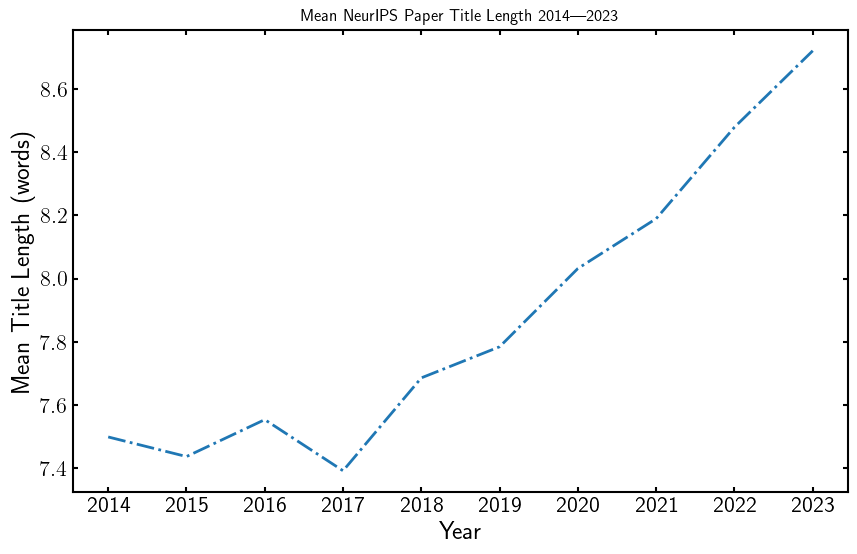

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(syears, list(mean_title_length_by_year.values()), "-.")
plt.xlabel("Year");
plt.ylabel("Mean Title Length (words)");
plt.title(f"Mean NeurIPS Paper Title Length {syears[0]}—{syears[-1]}")
# plt.savefig("images/title_length_history_2014_2023.png");

In [51]:
num_authors_by_year = {
    syear: [len(authors) for authors in historical_data[syear].values()]
    for syear in syears
}

In [52]:
mean_num_authors_by_year = {
    syear: np.mean(num_authors_by_year[syear])
    for syear in syears
}

Text(0.5, 1.0, 'Mean Number of Authors per NeurIPS Paper 2014—2023')

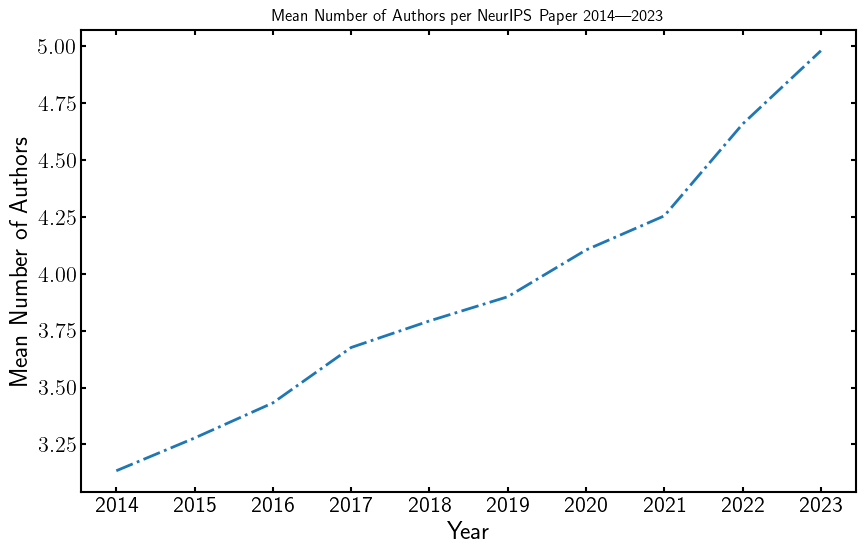

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(syears, list(mean_num_authors_by_year.values()), "-.")
plt.xlabel("Year");
plt.ylabel("Mean Number of Authors");
plt.title(f"Mean Number of Authors per NeurIPS Paper {syears[0]}—{syears[-1]}")
# plt.savefig("images/num_authors_history_2014_2023.png");

In [54]:
num_unique_authors_by_year = {
    syear: len(set([v for vals in historical_data[syear].values() for v in vals]))
    for syear in syears
}


Text(0.5, 1.0, 'Number of Unique Authors of NeurIPS Papers 2014—2023')

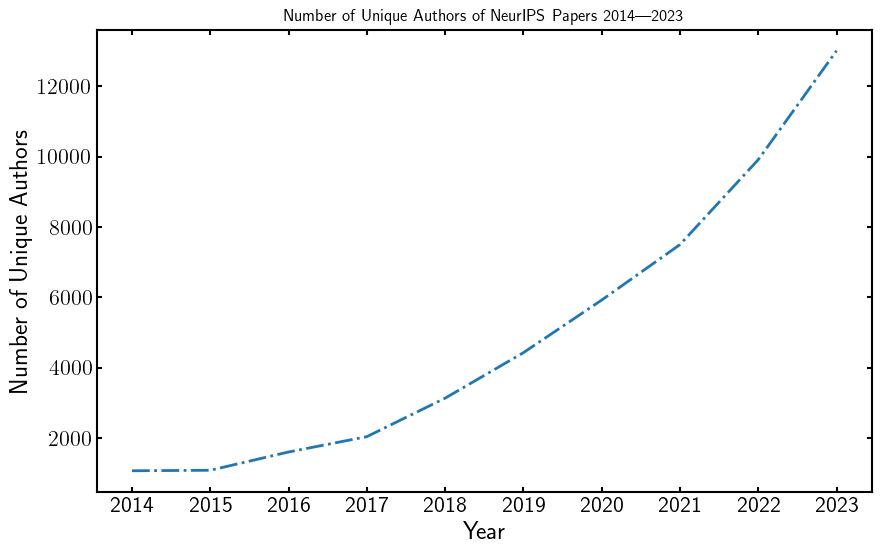

In [55]:
plt.figure(figsize=(10, 6))
plt.plot(syears, list(num_unique_authors_by_year.values()), "-.")
plt.xlabel("Year");
plt.ylabel("Number of Unique Authors");
plt.title(f"Number of Unique Authors of NeurIPS Papers {syears[0]}—{syears[-1]}")
# plt.savefig("images/unique_authors_history_2014_2023.png");